In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#pip install networkx==2.4

In [2]:
g=nx.read_weighted_edgelist('facebook_connectedness.csv', delimiter=",")
sub=['AE', 'AF', 'AG', 'AL', 'AM', 'AO', 'AT', 'AU', 'AW', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BS', 'BT', 'BW', 'BY', 'CA', 'CD', 'CF', 'CG', 'CH', 'CI', 'CM', 'CW', 'CY', 'DE', 'DJ', 'DK']
g1=g.subgraph(sub)

# Different layouts

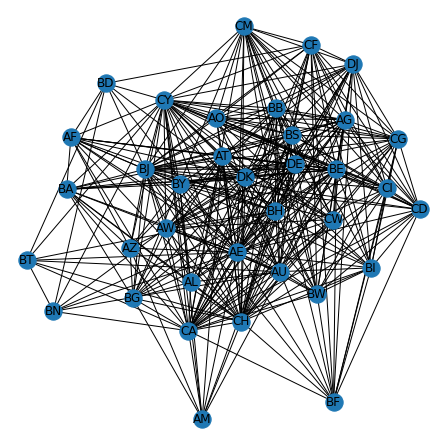

In [3]:
plt.figure(1,figsize=(6,6)) 
pos=nx.kamada_kawai_layout(g1)
nx.draw(g1,pos,with_labels=True)
plt.show()

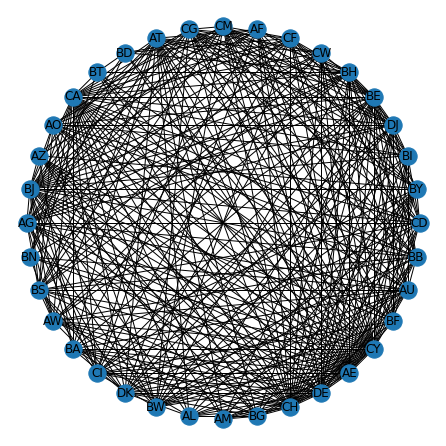

In [4]:
plt.figure(1,figsize=(6,6)) 
pos=nx.circular_layout(g1)
nx.draw(g1,pos,with_labels=True)
plt.show()

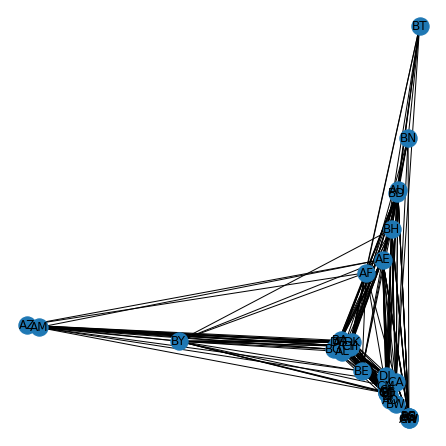

In [5]:
plt.figure(1,figsize=(6,6)) 
pos=nx.spectral_layout(g1)
nx.draw(g1,pos,with_labels=True)
plt.show()

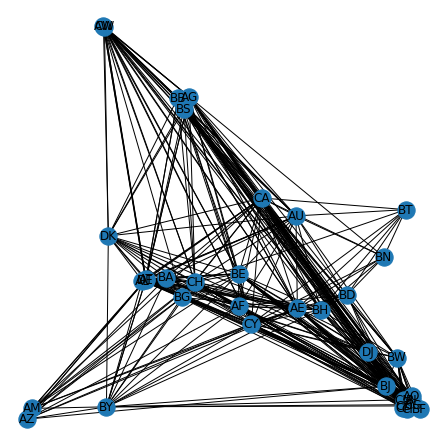

In [6]:
plt.figure(1,figsize=(6,6)) 
pos=nx.spring_layout(g1,iterations=200)
nx.draw(g1,pos,with_labels=True)
plt.show()

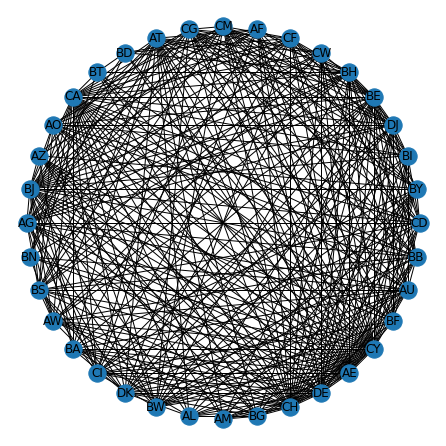

In [7]:
plt.figure(1,figsize=(6,6)) 
pos=nx.shell_layout(g1)
nx.draw(g1,pos,with_labels=True)
plt.show()

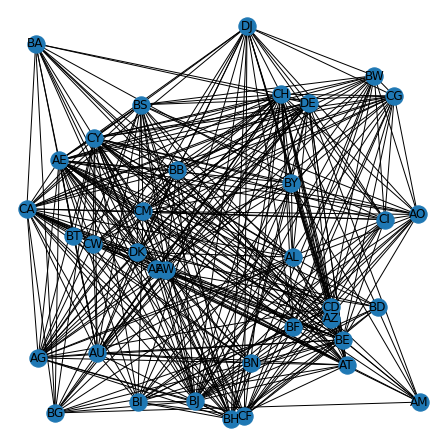

In [8]:
plt.figure(1,figsize=(6,6)) 
pos=nx.random_layout(g1)
nx.draw(g1,pos,with_labels=True)
plt.show()

#  Vary the size of nodes by their degree (number of neighbors)

In [9]:
#create a new attribute for each node
node_size=[]
for i in range (0,len(sub)):
    neighbor=len(list(g1.neighbors(sub[i])))
    g1.nodes[sub[i]]['neighbor']=neighbor
    node_size.append(neighbor)

In [11]:
node_size=np.array(node_size)
def normalization(data):
    _range = np.max(data) - np.min(data)
    return 500*(data - np.min(data)) / _range
node_size=normalization(node_size)
node_size=node_size.tolist()

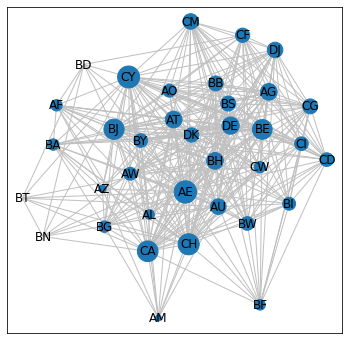

In [12]:
plt.figure(1,figsize=(6,6)) 
pos=nx.kamada_kawai_layout(g1)
nx.draw_networkx(g1,pos,nodelist=sub,node_size=node_size,edge_color="silver")
plt.show()

# colored nodes with colors representing node characteristics

In [13]:
node_list=nx.nodes(g1)
clustering=[nx.clustering(g1,str(n)) for n in node_list] 

In [14]:
degree=[g1.degree(n) for n in g1.nodes()] 

In [15]:
weighted_degree=[g1.degree(n, weight='weight') for n in g1.nodes()] 

In [16]:
closeness=[nx.closeness_centrality(g1,n) for n in g1.nodes()]

In [17]:
eigenvc=[]
t=nx.eigenvector_centrality(g1)
for k in t.keys():
    eigenvc.append(t[k])

In [18]:
characteristics=pd.DataFrame({'nodes': node_list, 'degree': degree, 'weighted degree': weighted_degree,'closeness': closeness, 'clustering': clustering,'eigenvector': eigenvc })
characteristics

,nodes,degree,weighted degree,closeness,clustering,eigenvector
0,CD,20,2.292390e+07,0.673077,0.869281,0.155934
1,BY,20,8.474816e+06,0.673077,0.705882,0.143454
2,BI,19,1.516713e+08,0.660377,0.867647,0.148698
3,DJ,23,3.478129e+08,0.714286,0.795238,0.181469
4,BE,31,9.806445e+06,0.853659,0.620690,0.226921
5,BH,25,1.689415e+07,0.744681,0.648221,0.182984
6,CW,17,5.861839e+08,0.636364,0.914286,0.138593
7,CF,21,5.284323e+08,0.686275,0.830409,0.160418
8,AF,17,2.133139e+07,0.636364,0.800000,0.126770
9,CM,23,2.686927e+07,0.714286,0.814286,0.180283


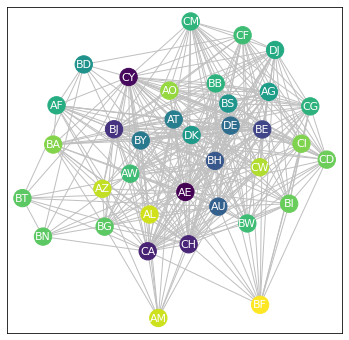

In [19]:
plt.figure(1,figsize=(6,6)) 
pos=nx.kamada_kawai_layout(g1)
nx.draw_networkx(g1,pos,node_color=characteristics['clustering'],edge_color="silver",font_color='white',font_size=11)
plt.show()

# Show link weights indicated by the thickness of the links

In [20]:
edge_width=[]
for (u,v,d) in g1.edges(data=True):
     edge_width.append(d['weight'])

In [21]:
edge_width=np.array(edge_width)
def normalization(data):
    _range = np.max(data) - np.min(data)
    return 1500*(data - np.min(data)) / _range
edge_width=normalization(edge_width)
edge_width=edge_width.tolist()

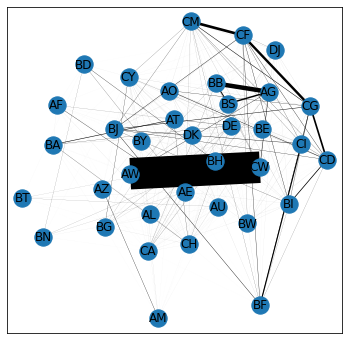

In [22]:
plt.figure(1,figsize=(6,6)) 
pos=nx.kamada_kawai_layout(g1)
nx.draw_networkx(g1,pos,width=edge_width)
plt.show()